<a id='top'></a>

# CSCI3022 S22



***

**Name**: ________________________________________________________________________

***

**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Bottom](#bot)

---

In [1]:
#old stalwarts
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

#new friends
import seaborn as sns
import statsmodels.api as sm #this line is now always in our opener
from statsmodels.stats.outliers_influence import summary_table
from patsy import dmatrices # for making design matrices out of categorical features #instead of sm.add_constant


[Back to top](#top)

<a id='p1'></a>
## (40 pts) Problem 1: Simulation and Hypothesis Testing
***

One measure we're often interested in for modeling is whether or not our data "looks" normally distributed. We have explored two diagnoses for this briefly whereby we compare histograms of residuals or "QQ" plots of residuals to the corresponding results of the normal. 

In tihs problem we'll explore a simplified variant of another common diagnostic that's **more general** for whether or a not a list of numbers comes from a specified distribution.  I recommend skimming [this link](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) about the Kolmogorov-Smirnov test.  Before we begin.



### A) How Similar are two distributions?

Consider trying to tell somebody that the uniform random variable $X \sim U[-2,2]$ is "very different" from the Normal $Z \sim N(0,1)$.  How would you do so?  We could plot their *pdf*s, but the **height** of a pdf is pretty meaningless, since probability lives in **area**.  Instead, we could maybe compare their **cdfs**.

Your task:

- Create a `linspace` of 1,000 values from -4 to 4.
- At those values as the $x$-axis, make a plot with two lines: the cdf of $Z$ and the cdf of $X$ as given above
- Print $\arg \max_y |F_Z(y)-F_X(y)|$, the **maximum** value of the absolute *difference* between the cdfs $F_Z$ and $F_X$ at your linspace locations.  In other words: how far vertically apart were the two cdfs at their *most* far apart location?

In [2]:
range_df = np.linspace(-4,4,1000)

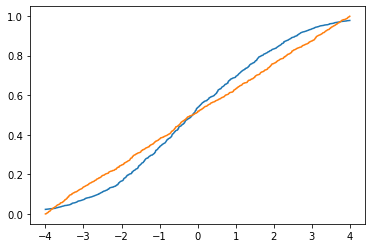

In [3]:
p = 1. * np.arange(len(range_df))/(len(range_df)-1)


x = np.sort(np.random.uniform(-2,2,1000))
plt.plot(range_df, stats.norm.cdf(x))


z = np.sort(np.random.normal(0,1,1000))
plt.plot(range_df, stats.norm.cdf(z))



In [4]:
#maximum
np.max(np.abs(x - z))

1.4794616805912733

 - As i observet he plot of the two lines (cdf) it seems that the two cdfs are a bit far vertically apart. The max value of the absulute 
difference between the cdfs is : (1.6312339080523683)

### B) How about *data* versus a distribution?

You should agree that it should maybe be possible to tell two random variables apart from their cdfs.  But what about data **from** a distribution?  This means we have noise or randomness, and it's harder to tell the difference between similar distributions!

Our tool for this is called the **empirical** cumulative density function ([ecdf]([https://en.wikipedia.org/wiki/Empirical_distribution_function])), which is roughly equivalent to the cdf version of a histogram: draw a picture of the *observed* cdf, which naturally will be a little "blocky" like a histogram.

Formally, the ecdf of a data set $X$ with $n$ observations is given by:

$$ecdf_X(x)=\frac{\text{# of elements of X that are less than or equal to x}}{n}$$

You can implement this function by hand, but you may also use `statsmodels.distributions.empirical_distribution.ECDF`.


Your task:

- **Simulate** 100 numbers from $X \sim U[-2,2]$ (see `stats.uniform.rvs` for syntax)
- Create a `linspace` of 1,000 values from -4 to 4.
- Using the `linspace` values as the $x$-axis, again make a plot with two lines: the cdf of the normal $Z$ but this time compared to the ecdf of the simulated $X$ values.
- Print $\arg \max_y |F_Z(y)-ecdf_X(y)|$, the **maximum** value of the absolute *difference* between the cdfs $F_Z$ and $F_X$ at your linspace locations.
- How does it compare to the "true" value in part A?  Run your code a few times and report at least 5 such values.

In [23]:
range_df = np.linspace(-4,4,1000)

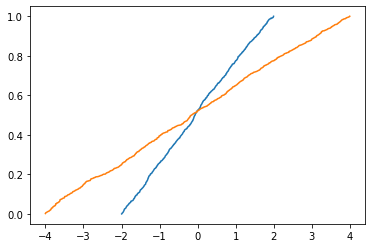

In [31]:
p = 1. * np.arange(len(range_df))/(len(range_df)-1)
#x = np.sort(range_df)
x = np.sort(np.random.uniform(-2,2,1000))
y = np.arange(len(range_df))/float(len(range_df))

#x = np.sort(np.random.uniform(-2,2,1000))
#plt.plot(range_df, stats.norm.ecdf(x))
plt.plot(x, y)
z = np.sort(np.random.normal(0,1,1000))
plt.plot(range_df, stats.norm.cdf(z))

In [29]:
#maximum
np.max(np.abs(x - z))

1.5161171973332879

 - As i observed he plot of the two lines (cdf) it seems that the two cdfs are a bit far vertically apart. The max value of the absulute 
difference between the cdfs is : (1.1279030859341983) which is close but a bit higher to the max number that we got in part A.

In [8]:
#def ecdf(data):
#    sorted_data = np.sort(data)
#    n = sorted_data.size
#    return (sorted_data, np.arange(1, n+1)/n)



#x =stats.uniform.rvs(-2,2,100)
#a,b = ecdf(x)
#plt.plot(range_df, z)
#plt.scatter(a,b)

### C) How about for Normals?

The **distribution** of the numbers you compute in part $B$ is the basis of one measure for whether or not *data* fits a *proposed* distribution.  Our goal is to create a hypothesis test from scratch (recall HW6 # 3 for a similar concept) that gives us the ability to figure out how big of a distance we should get for these measures if the data **does** match the proposed distribution.

In other words, we're going to simulate from the null hypothesis and use it to apply to data.  Our motivating example is the `hubble.csv` data from HW7 and nb15, which had 24 observations.

**C1)** Your task:
- 1) Simulate 24 data points $X$ from the $N(4,10)$ distribution.
- 2) **Standardize** $X$ by converting it to a vector of Z-score: $X=\frac{X-\bar{X}}{S_X}$
- 3) At the same linspace as in parts A/B, compute the maximum distance between the ecdf of the standarized $X$ and the cdf of the N(0,1)$.
- Repeat steps 1-3 1000 times until you have a simulated distribution of max distances observed.


**C2) ** Make a histogram of your simulated max values observed.

**C3) ** Create a one-tailed hypothesis test corresponding to the *alternative* hypothesis of "the data does not come from the normal distribution" by using a test that rejects the null hypothesis if the distance between ecdf and cdf is $>c$ for some $c$.  If your tolerance for type I error is .10, what do you choose for $c$ on a data set of 24 observations?


**C4) ** Apply your hypothesis test in part C3 to the `hubble.csv` data by standardizing it and computing its ecdf's distance-from-normal.  The hubble data doesn't **look** very normal, but could we actually conclude that it definitely wasn't normal?  What does this tell you about data sets with only 24 observations?



---
[Back to top](#top)
<a id='p3'></a>
## (60 pts) Problems 2-3: Regression


The [Anage](https://genomics.senescence.info/species/index.html) database is a large repositiory of biological information, and includes various properties of various animals with an eye towards understanding the effects of aging in different species.  Most of the columns should be self-explanatory, but for more information you can consult their overview, [here](https://genomics.senescence.info/help.html#anage).

A couple of [acronyms](https://genomics.senescence.info/software/demographic.html) in the columns: IMR stands for "initial mortality rate," and represents non-age related deaths.  MRDT is the "mortality doubling rate," and is a measure for the age-related species deaths.

Unlike the *descriptive* analysis we did of this data set in the first exam coding, on this problem we will attempt to handle *prediction*.  As before, we will target the birth weight column, this time as the **response** to a linear model. 

The data is loaded in with a couple of preliminary explorations below.

In [9]:
df=pd.read_csv('AnAge.csv', encoding='UTF-8')
print(df.columns) #information available: many numeric columns are blank for many species
print(df.shape) #4224 species available
df.head(3)

Index(['HAGRID', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Species', 'Common name', 'Female maturity (days)',
       'Male maturity (days)', 'Gestation/Incubation (days)', 'Weaning (days)',
       'Litter/Clutch size', 'Litters/Clutches per year',
       'Inter-litter/Interbirth interval', 'Birth weight (g)',
       'Weaning weight (g)', 'Adult weight (g)', 'Growth rate (1/days)',
       'Maximum longevity (yrs)', 'Source', 'Specimen origin', 'Sample size',
       'Data quality', 'IMR (per yr)', 'MRDT (yrs)', 'Metabolic rate (W)',
       'Body mass (g)', 'Temperature (K)', 'References'],
      dtype='object')
(4224, 31)


,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
0,3.0,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1.294130e+11
1,5.0,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,2.203250e+37
2,6.0,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,6.340740e+54


## (40 pts) Problem 2: Single-Predictor Regression

### A) A naive model
Suppose our goal is to predict the `Birth weight (g)` of a species using only its `Temperature (K)`.  

Your task:
- Create a new data frame with only these two columns.  Then drop any rows with missing observations.
-  Make a linear model with birth weight as the response, predicted by temperature.  Print the summary table, and write the final model in a markdown cell.
- Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.
- Does this model seem appropriate?  For each of the 4 major assumptions of the simple linear regression model, use your plots in part B to decide whether or not the data set meets those assumptions (don't spend too much time here, just look things over!)


In [10]:
df_birth_temp = df[['Birth weight (g)','Temperature (K)']].dropna()
df_birth_temp

,Birth weight (g),Temperature (K)
1530,7.670,307.85
1531,0.700,303.95
1532,11.500,308.15
1533,3.950,304.05
1534,3.600,303.95
...,...,...
2851,2.680,311.85
2852,1.500,310.85
2856,5.355,309.15
2858,1800.000,307.65


In [11]:
mod =sm.OLS(df_birth_temp['Birth weight (g)'], df_birth_temp['Temperature (K)'])
res = mod.fit()
#print(res.summary())
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Birth weight (g)   R-squared (uncentered):                   0.009
Model:                            OLS   Adj. R-squared (uncentered):              0.006
Method:                 Least Squares   F-statistic:                              3.313
Date:                Sat, 30 Apr 2022   Prob (F-statistic):                      0.0695
Time:                        06:13:33   Log-Likelihood:                         -4853.4
No. Observations:                 386   AIC:                                      9709.
Df Residuals:                     385   BIC:                                      9713.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Temperature (K)    20.9190     11.494      1.820      0.070      -1.679      43.517
==============================================================================
Omnibus:                      895.451   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2005094.394
Skew:                          18.472   Prob(JB):                         0.00
Kurtosis:                     354.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

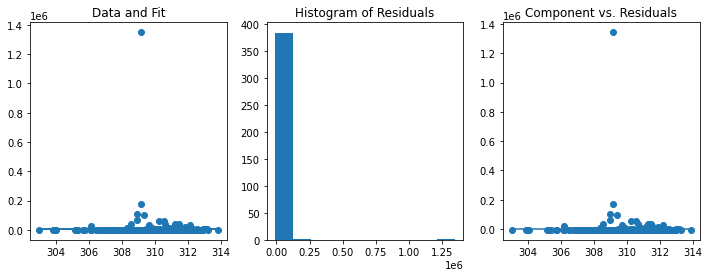

In [12]:
fig, ax= plt.subplots(figsize=(12,4), ncols=3)

ax[0].scatter(df_birth_temp['Temperature (K)'], df_birth_temp['Birth weight (g)'])
ax[0].plot( df_birth_temp['Temperature (K)'], res.fittedvalues)

ax[0].set_title('Data and Fit')
ax[1].hist(res.resid)
ax[1].set_title('Histogram of Residuals')
ax[2].scatter(df_birth_temp['Temperature (K)'], res.resid)
ax[2].set_title('Component vs. Residuals')
ax[2].hlines(0, xmin=np.min(df_birth_temp['Temperature (K)']), xmax=np.max(df_birth_temp['Temperature (K)']))







#fig, ax= plt.subplots(figsize=(12,4), ncols=3)

#ax[0].scatter(df_birth_temp['Birth weight (g)'], df_birth_temp['Temperature (K)'])
#ax[0].plot( df_birth_temp['Birth weight (g)'], res.fittedvalues)

#ax[0].set_title('Data and Fit')
#ax[1].hist(res.resid)
#ax[1].set_title('Histogram of Residuals')
#ax[2].scatter(df_birth_temp['Birth weight (g)'], res.resid)
#ax[2].set_title('Component vs. Residuals')
#ax[2].hlines(0, xmin=np.min(df_birth_temp['Birth weight (g)']), xmax=np.max(df_birth_temp['Birth weight (g)']))




#huge outlier is affecting the line of the fit,drawing it away from the center.

huge outlier is affecting the line of the fit,drawing it away from the center

### B) A better model

You should have **emphatically** decided that there were problems in your model.  But you may already have known this: the `Birth weight (g)` is logarithmic, so it might make sense for our erorrs to be as well.  One solution is to **replace** `Birth weight (g)` as our target with the logarithm of birth weight instead, and then try to predict *that* using `Temperature (K)`.

Your task: repeat all 5 steps of the analysis in part A, this time using the natural logarithm of `Birth weight (g)` as the response variable.
- Create a new data frame with only these two columns.  Then drop any rows with missing observations.
-  Make a linear model with log birth weight as the response, predicted by temperature.  Print the summary table, and write the final model in a markdown cell.
- Make a series of 3 side-by-side plots.  Lefthand plot: scatter plot of the data set and overlay the line of best least-squares fit.  Middle plot: histogram of residuals of best least-squares fit are the y-axis.  Righthand plot: scatter plot where the original x-values are the x-axis and the residuals are the y-axis.
- Does this model seem appropriate?  For each of the 4 major assumptions of the simple linear regression model, use your plots in part B to decide whether or not the data set meets those assumptions.
- Does your data set appear to have outliers?

In [13]:
mod2 =sm.OLS(np.log(df_birth_temp['Birth weight (g)']), df_birth_temp['Temperature (K)'])
res2 = mod2.fit()
#print(res2.summary())
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Birth weight (g)   R-squared (uncentered):                   0.482
Model:                            OLS   Adj. R-squared (uncentered):              0.481
Method:                 Least Squares   F-statistic:                              358.2
Date:                Sat, 30 Apr 2022   Prob (F-statistic):                    6.06e-57
Time:                        06:13:34   Log-Likelihood:                         -1020.5
No. Observations:                 386   AIC:                                      2043.
Df Residuals:                     385   BIC:                                      2047.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Temperature (K)     0.0106      0.001     18.925      0.000       0.009       0.012
==============================================================================
Omnibus:                        7.371   Durbin-Watson:                   0.373
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.391
Skew:                           0.338   Prob(JB):                       0.0248
Kurtosis:                       3.036   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

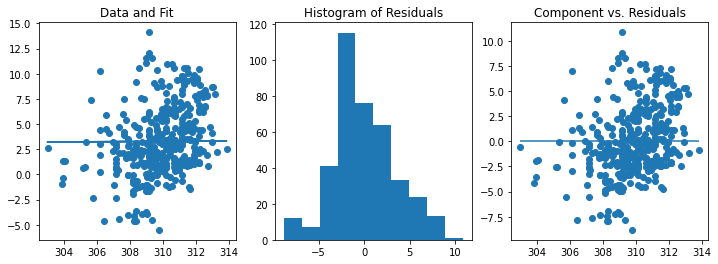

In [14]:
fig, ax= plt.subplots(figsize=(12,4), ncols=3)
ax[0].scatter(df_birth_temp['Temperature (K)'], np.log(df_birth_temp['Birth weight (g)']))
ax[0].plot( df_birth_temp['Temperature (K)'], res2.fittedvalues)
ax[0].set_title('Data and Fit')
ax[1].hist(res2.resid)
ax[1].set_title('Histogram of Residuals')
ax[2].scatter(df_birth_temp['Temperature (K)'], res2.resid)
ax[2].set_title('Component vs. Residuals')
ax[2].hlines(0, xmin=np.min(df_birth_temp['Temperature (K)']), xmax=np.max(df_birth_temp['Temperature (K)']))


#### Part C) Improvements: 

If the data set violated any assumptions in part B, adjust the model accordingly if possible.  Consider removing outliers, adding higher order polynomial terms, etc.  If you adjust the model, make another table and set of plots as in parts A and B of the new fit and the new residuals.


Then, write a sentence or two describing your thought process.  If you did not adjust a model, why not?  If you did, what are the effects?

the model look better because the outlier is been dealt with and fulfills homoskedesity , we used .log for that, the distribution of residuals is better

<br>

---
[Back to top](#top)
<a id='p3'></a>

## [20 points] Problem 3: Go Big: Multiple Linear Regression

This problem is an open-ended problem where we will approach the same problem as in #2 but you may use more columns in the context of Multiple Linear Regression.  

Your goal is to demonstrate that you have an understanding of how to choose between columns and validate/check for problems in a multiple linear regression problem.  

The data set has been scrubbed to only include non-missing values of the following columns:
- The numerical column `Gestation/Incubation (days)`
- The numerical column `Litter/Clutch size`
- The numerical column `Maximum longevity (yrs)`
- The numerical column `Temperature (K)`
- The numerical column `Weaning (days)`

It also includes the **categorical** column `Order`, which you may use as a categorical predictor (use `pd.get_dummies`).  Use of this column make the problem harder, but will generate better fits.  Using it and carefully determining **which** orders can be used to help prediction is worth up to 5 points of extra credit.

The target/response is still `Birth weight (g)`, but as before you should apply a logarithm to it.

In [15]:
dfmlr=df[['Birth weight (g)','Common name', 'Order', 'Gestation/Incubation (days)', 'Litter/Clutch size',\
          'Weaning (days)', 'Maximum longevity (yrs)', 'Metabolic rate (W)', 'Temperature (K)']]
dfmlr=dfmlr.dropna()
print(dfmlr.shape)
dfmlr.head(3)

(234, 9)


,Birth weight (g),Common name,Order,Gestation/Incubation (days),Litter/Clutch size,Weaning (days),Maximum longevity (yrs),Metabolic rate (W),Temperature (K)
1530,7.67,Lesser hedgehog tenrec,Afrosoricida,55.0,6.00,29.0,19.0,0.750,307.85
1532,11.50,Streaked tenrec,Afrosoricida,59.0,4.00,21.0,2.7,0.380,308.15
1533,3.95,Dobson's shrew tenrec,Afrosoricida,61.0,2.67,29.0,5.6,0.315,304.05




**Rubric Notes:**
This problem is by design very open-ended.  It is meant to reflect a real-world problem solving process.  For this problem, at the very least, you should:
- Include and explain which method you're using to remove redundant columns in part B
- Include a (short) sentence for **each** of the diagnositic plots in part C, determining whether your current model is meeting the standard assumptions of multiple linear regression
- Include some code, sentences, and/or visualizations demonstrating what *alternative models* you tried and/or considered.
- Include a sentence interpreting why your final model **makes sense** in the context of the problem - and it if doesn't, you'll want to try to explain why not.

Graders will look for the both the diagnostic plots and **plenty** of complete English sentences describing what you're doing and why you think it will help answer the data science question: how do we create the best model we can to quantify how price can be explained and predicted by the features of the house.

As a quick heuristic: you should be able to find models with adjusted $R^2$ to above 75% using only minor adjustments on the initially provided numerical columns, and above 90% if youuse the categorical column.

** Part 3 A: Explore**

Make pairwise scatter plots of the continuous predictors/covariates, both against each other and against the outcome (log weight).   Does the relationship between the independent variables and the dependent variables appear to be linear?  Do there appear to be independent variables that are collinear?

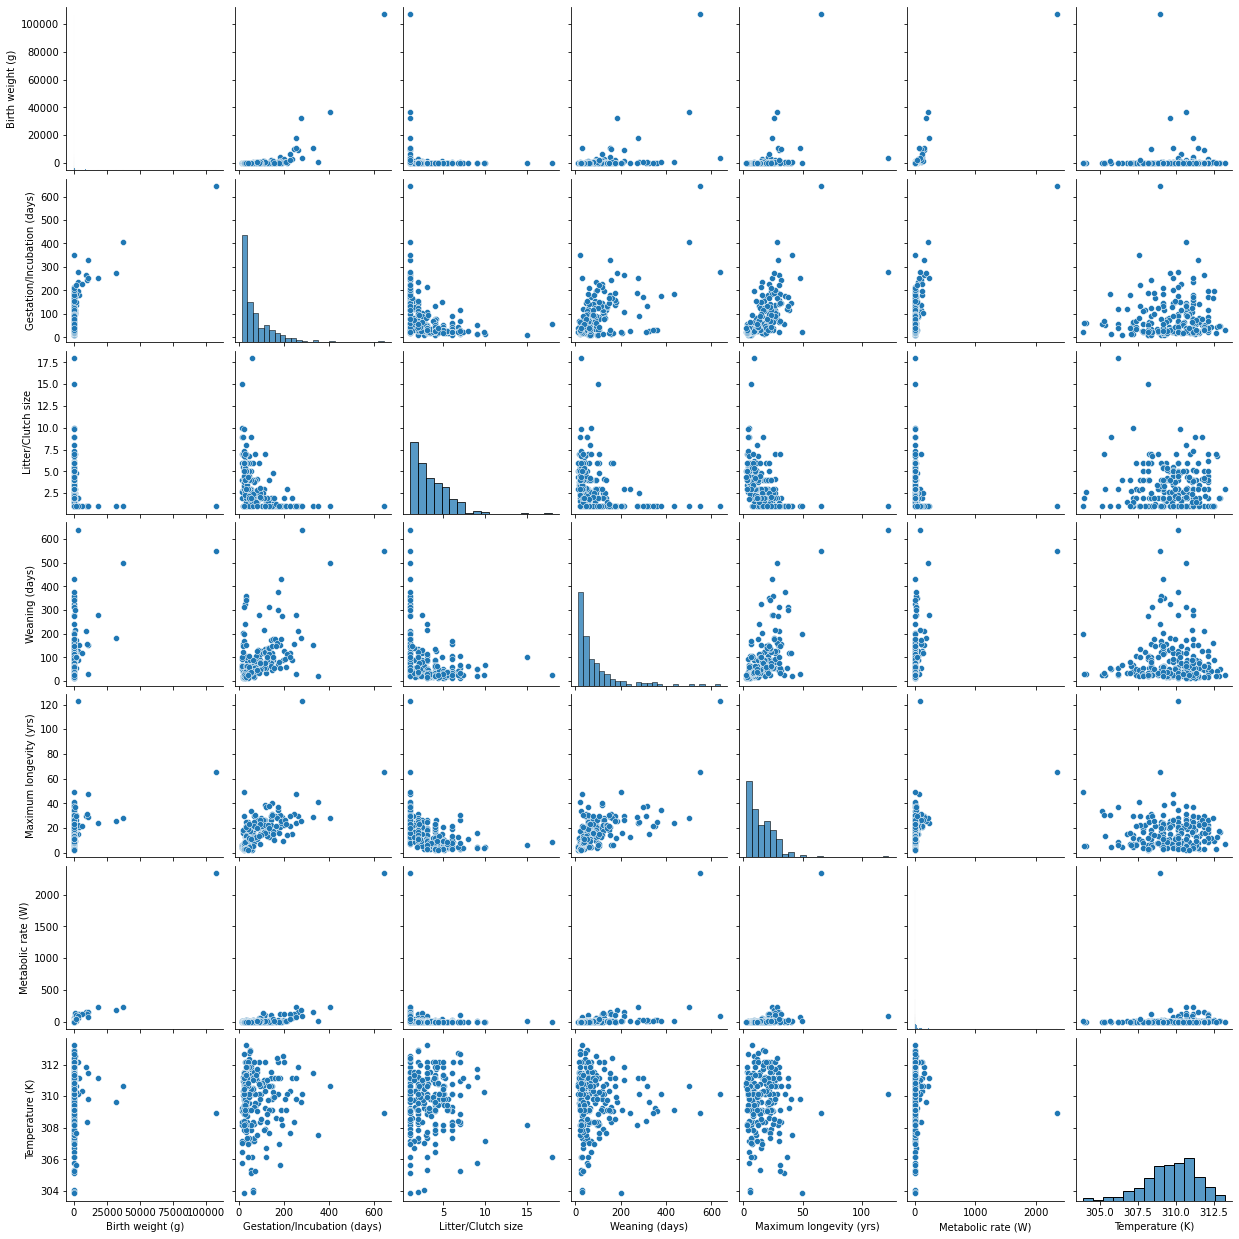

In [16]:
sns.pairplot(dfmlr)
#metabolic is linear

maximum longetivty is linear to gestation , 
metabolic is linear to the birth weight
weaning days is linear to the maximum longetivity and gestation 

** Part 3 B: Make a Model**

By adding columns to a minimal model or by subtracting columns from the full model, use one of the criteria in the class to create a reasonable candidate model.  These may include:

- stepwise optimization of adjusted $R^2$
- stepwise inclusion/removal of most or least-significant T-tests on coefficients
- removing columns based on VIFs

Use a markdown cell to explain exactly what method you're using to construct your model.

In [17]:
dfmlr_preprocessed = pd.get_dummies(dfmlr, prefix=['Order'])
X = dfmlr_preprocessed.drop(columns=['Birth weight (g)'])
y = dfmlr_preprocessed['Birth weight (g)']
model = sm.OLS(y,X).fit()
model.summary()

ValueError: Length of 'prefix' (1) did not match the length of the columns being encoded (2).

In [ ]:
model.rsquared

In [ ]:
def find_model(df):
    predictors = [ 'Order', 'Gestation/Incubation (days)', 'Litter/Clutch size',\
          'Weaning (days)', 'Maximum longevity (yrs)', 'Metabolic rate (W)', 'Temperature (K)'] #all predictors 
    
    while(len(predictors)!=0):
        X=df[predictors]
        if 'Order' in X.columns:
            X = pd.get_dummies(X, prefix=['Order'])
        X=sm.add_constant(X)
        Y=df['Birth weight (g)']
        model = sm.OLS(Y, X).fit() #fit model
        r = model.rsquared_adj
        remov=0
        for i in range(len(predictors)):
            model1=predictors.copy() #find predictor that after removing, leads to largest R^2
            model1.remove(predictors[i])
            X=df[model1]
            if 'Order' in X.columns:
                X = pd.get_dummies(X, prefix=['Order'])
            X=sm.add_constant(X)
            Y=df['Birth weight (g)']
            model = sm.OLS(Y, X).fit()
            model_r = model.rsquared_adj
            if (model_r>r):
                remov=predictors[i]
                r=model_r
        if (remov!=0):
            predictors.remove(remov)
        else: break #if nothing was removed
    
    X=df[predictors]
    if 'Order' in X.columns:
                X = pd.get_dummies(X, prefix=['Order'])
    X=sm.add_constant(X)
    Y=df['Birth weight (g)']
    model = sm.OLS(Y, X).fit()
    return model


model1=find_model(dfmlr)
#print(model1.summary())
model1.summary()

sm.fit 

** Part 3 C: Validate your Model**


Perform a thorough discussion of the underlying regression assumptions of your model in part 1B.  You should plot a predictor vs. residuals plot for each column and histogram OR qqplot of the overall residuals.  Make sure to also check for non-linearity, which lives in the predictor vs. residuals plots for each column.  

*Hint:* Consider applying similar functions to your predictor columns as you did to the response, as they're also in similar all-positive, right-skewed units.

In [ ]:
columns_for_residual = ['Gestation/Incubation (days)', 'Litter/Clutch size',\
          'Weaning (days)', 'Maximum longevity (yrs)', 'Metabolic rate (W)', 'Temperature (K)']
fig, ax= plt.subplots(figsize=(20,4), ncols=len(columns_for_residual))
for i in range(len(columns_for_residual)):
    ax[i].scatter(X.iloc[:,i], model1.resid)
    ax[i].set_title(columns_for_residual[i]  )
    ax[i].hlines(0, xmin=np.min(X.iloc[:,i]), xmax=np.max(X.iloc[:,i]))
    
    
#their is a hige outlier affecting the results , which cauces the data not to be normal

In [ ]:
plt.hist(model1.resid)
plt.title('Histogram')
#errors is concentrated in one location

** Part 3 D: Tune your Model**


Based on your work in parts 1B and 1C, **iterate** on your model.  Consider removing terms or adding higher-order polynomials one at a time unless you are satisfied that your model captures the data as well as possible.  Each time you add or subtract a term from your model, you should repeat the steps in parts B and C: a summary table and exploration of assumptions.

no changes needed because the f-stastics of our model is very high , borth r squared adn r is high, tried to use the **log** of the birth weight to make a prediction in order to suppress the impact of the outlier, but the r squared and the f-statitcs didnt improve 

** Part 3 E: Explain your Model**

**Justify** your choices: there are a lot of ways to choose a "best" model: we've mentioned e.g. only including significant predictors versus F-tests versus optimizing R-squared.  Explain what terms you chose and why they were appropriate! 

the higher the r squared (without sacrificing the adjusted r squared ) the better a model is . The same also goes for the f-statistics 

<br>

---

[Back to top](#top)
<a id='bot'></a>